**PRE LECTURE HOMEWORK**

**Number 1. Use fig.add_[h/v]line() and fig.add_[h/v]rect() to mark, respectively, location (mean and median) and scale (range, interquartile range, and a range defined by two standard deviations away from the mean in both directions) of flipper_length_mm for each species onto plotly histograms of flipper_length_mm for each species in the penguins dataset**

In [32]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

# Load penguins dataset
penguins = sns.load_dataset("penguins")

# Function to add mean, median, and range (IQR, 2 std) annotations for a given species
def add_statistics(fig, species_data):
    # Calculate statistics
    mean_val = species_data.mean()
    median_val = species_data.median()
    min_val, max_val = species_data.min(), species_data.max()
    q1, q3 = np.percentile(species_data.dropna(), [25, 75])
    std_val = species_data.std()
    
    # Define ranges
    iqr_range = [q1, q3]
    std_range = [mean_val - 2*std_val, mean_val + 2*std_val]

    # Add lines for mean and median
    fig.add_vline(x=mean_val, line=dict(color='blue', dash='dash'), annotation_text="Mean", annotation_position="top left")
    fig.add_vline(x=median_val, line=dict(color='green', dash='dash'), annotation_text="Median", annotation_position="top right")

    # Add rectangles for scale (IQR, 2STD range, min-max)
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor="red", opacity=0.1, line_width=0, annotation_text="Min-Max Range")
    fig.add_vrect(x0=iqr_range[0], x1=iqr_range[1], fillcolor="yellow", opacity=0.2, line_width=0, annotation_text="IQR")
    fig.add_vrect(x0=std_range[0], x1=std_range[1], fillcolor="purple", opacity=0.2, line_width=0, annotation_text="2*STD")
    
    return fig

# Filter out the three species
species_list = ['Adelie', 'Chinstrap', 'Gentoo']
for species in species_list:
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Create histogram for each species
    fig = px.histogram(species_data, nbins=30, title=f'Flipper Length Distribution for {species} Penguins', 
                       labels={'value':'Flipper Length (mm)'}, opacity=0.75)
    
    # Add statistical annotations (mean, median, IQR, 2*STD range)
    fig = add_statistics(fig, species_data)
    
    # Show the plot
    fig.show()

**Number 2: Transition your ChatBot session from the previous problem to repeat the previous problem, but this time using seaborn kernel density estimation (KDE) plots to produce the desired figures organized in row of three plots**


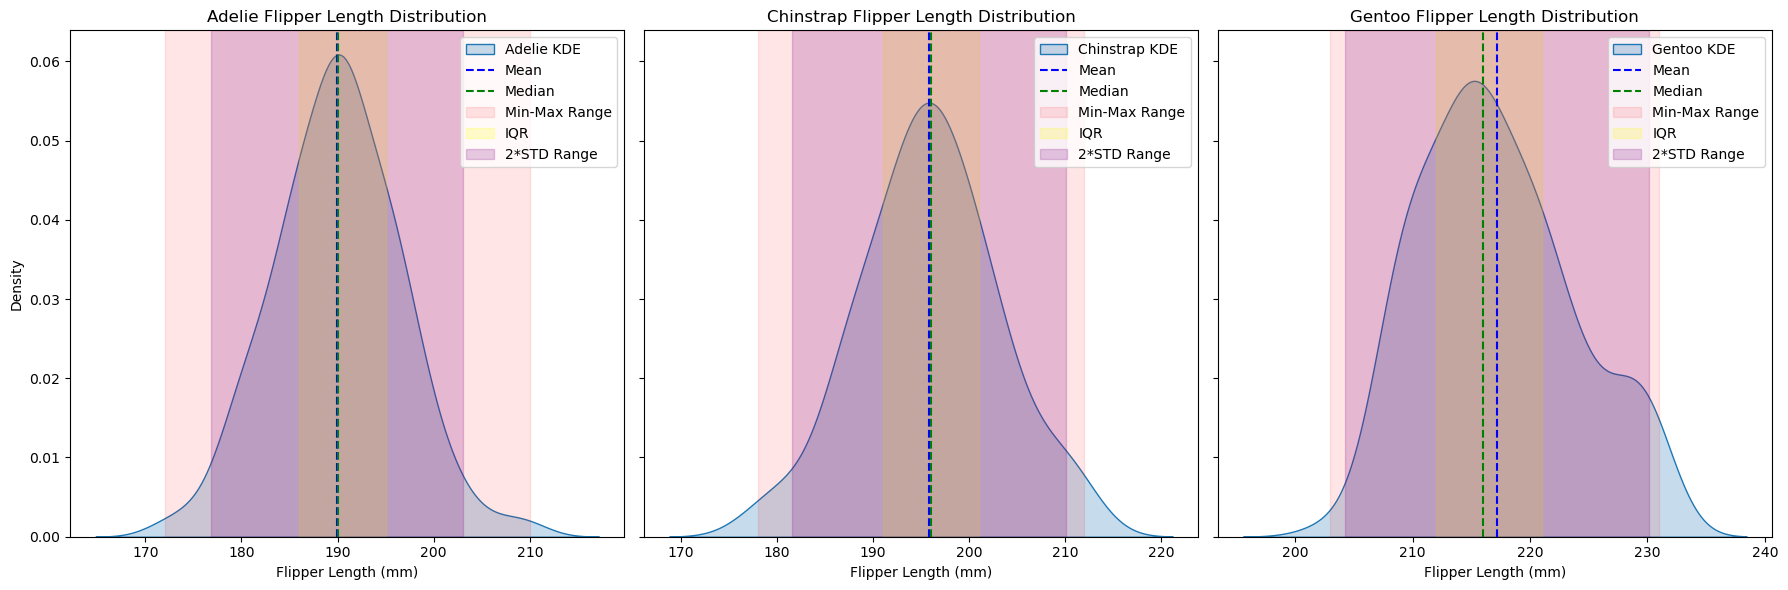

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load penguins dataset
penguins = sns.load_dataset("penguins")

# Create a figure with three subplots (one for each species) in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Function to add mean, median, and range (IQR, 2 std) to KDE plots
def add_statistics(ax, species_data, species_name):
    # Calculate statistics
    mean_val = species_data.mean()
    median_val = species_data.median()
    min_val, max_val = species_data.min(), species_data.max()
    q1, q3 = np.percentile(species_data.dropna(), [25, 75])
    std_val = species_data.std()
    
    # Define ranges
    iqr_range = [q1, q3]
    std_range = [mean_val - 2*std_val, mean_val + 2*std_val]

    # Plot KDE
    sns.kdeplot(species_data.dropna(), ax=ax, fill=True, label=f'{species_name} KDE')

    # Add lines for mean and median
    ax.axvline(mean_val, color='blue', linestyle='--', label='Mean')
    ax.axvline(median_val, color='green', linestyle='--', label='Median')

    # Add shaded regions for scale (IQR, 2*STD, min-max)
    ax.axvspan(min_val, max_val, color='red', alpha=0.1, label='Min-Max Range')
    ax.axvspan(iqr_range[0], iqr_range[1], color='yellow', alpha=0.2, label='IQR')
    ax.axvspan(std_range[0], std_range[1], color='purple', alpha=0.2, label='2*STD Range')

    # Add labels and title
    ax.set_title(f'{species_name} Flipper Length Distribution')
    ax.set_xlabel('Flipper Length (mm)')
    ax.legend()

# List of species
species_list = ['Adelie', 'Chinstrap', 'Gentoo']

# Iterate through the species and create a KDE plot for each one
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    add_statistics(axes[i], species_data, species)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

**Number 3: Search online for some images of box plots, histograms, and kernel density estimators (perhaps for the same data set); describe to a ChatBot what you think the contrasting descriptions of these three "data distribution" visualization methods are; and then see if the ChatBot agrees and what "pros and cons" list of these three "data distribution" visualization methods your ChatBot can come up with; finally, describe your preference for one or the other and your rationale for this preference**

Pros and Cons list that ChatGPT provided:

**1. Box Plot:**
A box plot (also known as a box-and-whisker plot) visualizes the distribution of data by displaying its median, quartiles (Q1, Q3), and potential outliers.

**Pros**:
Summarizes key distribution statistics: Provides a quick overview of the median, interquartile range (IQR), and potential outliers.
Easily identifies outliers: Box plots highlight values outside the 1.5 IQR range as potential outliers.
Compact visualization: Good for comparing multiple datasets side by side.

**Cons**:
No sense of distribution shape: It does not show the underlying distribution or how data is spread between quartiles.
Less detailed than histograms/KDE: Only provides summary statistics without showing how the data is distributed within the quartiles.
No information on frequency: It doesn't show how often certain values occur within the dataset

**2. Histogram:**
A histogram divides the data into bins and counts the frequency of data points within each bin. It's a traditional method for visualizing data distribution.

**Pros**:
Shows frequency of values: Offers a clear view of how often data points occur within specific ranges (bins).
Good for detecting skewness: Easily reveals patterns, such as skewed distributions, gaps, or multimodal distributions.
Straightforward: Simple to interpret and widely used in introductory data analysis.

**Cons**:
Sensitive to bin size: Choosing an appropriate bin size is critical—too few bins can hide important details, while too many bins can overcomplicate the distribution.
Blocky representation: Since data is aggregated into bins, it can sometimes hide the true smoothness of a distribution.
No underlying probability density: A histogram only counts occurrences, so it doesn’t smooth the data to show the probability density like a KDE plot.

**3. KDE Plot:**
A KDE plot (Kernel Density Estimation) smooths the frequency of data points to estimate the probability density function of a continuous variable.

**Pros**:
Smooth representation: It provides a smoother curve that represents the distribution more fluidly than histograms.
No bin size problem: Unlike histograms, KDE does not require binning, making it easier to detect subtle features like bimodal distributions.
Density-based: KDE directly estimates the probability density, offering more detailed insight into the overall distribution of the data.

**Cons**:
Sensitive to bandwidth: The smoothness of the KDE is highly dependent on the chosen bandwidth (the smoothing parameter). Too small can make the plot noisy, too large can oversmooth important features.
Less intuitive: While visually appealing, some users may find KDE plots harder to interpret compared to histograms, especially when considering probability densities.
Doesn’t show exact counts: Unlike histograms, KDE plots do not give clear information about the frequency of data points in specific intervals.


*I prefer the histogram because in my opinion I feel like it is the easiest to interpret, compared to a KDE plot or box plot I feel like histograms are less "crowded" ands directly show the frequency of data points within specific ranges and is very straightforward. Histograms can easily be compared side by side for different datasets or variables.*

https://chatgpt.com/c/66f6116b-ae74-8012-bff0-c193de31ce1c

**Number 4: Run the code below and look at the resulting figure of distrubutions and then answer the following questions**

In [37]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

***1. Which datasets have similar means and similar variances***

 The datasets data1 (A) and data3 (C) have both similar means and variances.

data1 (A) has a mean of 4.97 and a variance of 8.46.

data3 (C) has a mean of 5.00 and a variance of 9.08.

The means of these datasets are extremely close, both being just around 5. This means that their central tendencies — the values around which the data is clustered — are almost identical. Additionally, their variances are also quite close, with both datasets having a large variance of around 8.5 to 9.0. This indicates that both datasets are spread out widely across the data range. The combination of similar means and variances suggests that these two datasets likely have distributions that resemble each other quite closely in terms of both their center and their spread.


***2. Which datasets have similar means but quite different variances***

Several datasets have similar means, but one pair stands out for having similar means with quite different variances: data1 (A), data2 (B), and data3 (C).

data1 (A) has a mean of 4.97 and a variance of 8.46.

data2 (B) has a mean of 5.09 and a variance of 2.20.

data3 (C) has a mean of 5.00 and a variance of 9.08.

  
***3. Which datasets have similar variances but quite different means***

There are no pairs of datasets with highly similar variances but distinctly different means, but the closest comparison would involve data1 (A) and data3 (C):


data1 (A) has a variance of 8.46 and a mean of 4.97.

data3 (C) has a variance of 9.08 and a mean of 5.00.


While their means are nearly identical (both around 5), their variances are also quite close, so in this case, there is not a strong example of datasets with similar variances but different means. However, if we consider this from the perspective of identifying other datasets, there are no clear candidates with drastically different means and similar variances.


***4. Which datasets have quite different means and quite different variances***

The clearest pair with both quite different means and quite different variances is data2 (B) and data4 (D):

data2 (B) has a mean of 5.09 and a variance of 2.20.

data4 (D) has a mean of 6.01 and a variance of 0.24.


The means of these two datasets are quite different, with data2 (B) centered around 5.09 and data4 (D) centered around 6.01. This indicates that the central tendencies of the data in each dataset are about one unit apart. The difference in their variances is even more striking: data2 (B) has a moderate variance of 2.20, indicating a relatively moderate spread of data around the mean, whereas data4 (D) has a very small variance of 0.24, meaning the data in data4 is very tightly clustered around the mean.

**POST LECTURE HW**

**Number 5: Start a new ChatBot session to explore the general relationship between the mean and median and "right" and "left" skewness (and why this is); what the following code does and how it works; and then explain (in your own words) the relationship between the mean and median and "right" and "left" skewness and what causes this, using and extending the code to demonstrate your explanation through a sequence of notebook cells.**

*What is the  relationship between the mean and median?*

The mean is the average of all the data points, so it is influenced by every value, including extreme outliers. The median is the midpoint of the dataset (the value that separates the higher half from the lower half) and is not sensitive to extreme values (outliers). 

*Relationship in distributions*

In a perfectly symmetric data set (a normal distribution), the mean and median will be the same. In terms of the relationship between the mean and median, in a right-skewed distribution, the mean is typically greater than the median because the longer tail on the right pulls the mean upwards, while the median remains less affected by the extreme values. In comparison, in a left-skewed distribution, the mean tends to be less than the median, as the negative values in the tail pull the mean downwards. 

*Explaining the relationship between the mean and median and "right" and "left" skewness and what causes this using the code provided below:*

In [11]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px  

sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

The code generates two datasets:

Right-Skewed Data (sample1): Generated from a gamma distribution, which is naturally right-skewed.

Left-Skewed Data (sample2): Created by negating the values from the same gamma distribution, flipping it to be left-skewed.

*Right-Skewed Distribution (Sample 1)*

Relationship Between Mean, Median, and Skewness

- In sample1, most of the values will cluster around the lower end (e.g., between 0 and some upper limit), while a few values will extend far into the right tail (higher values). This characteristic of having a long tail on the right is what makes it right-skewed (or positively skewed).

Effect on Mean and Median:

- Since the mean considers all values, including the few high values in the right tail, it gets pulled upward, making it greater than the median.
- The median, being the middle value, remains relatively unaffected by the extreme values. It will be closer to the central mass of the data.

In a right-skewed distribution, the mean is typically greater than the median:
- If you were to plot a histogram of sample1, you would see a peak on the left with a long tail extending to the right, reinforcing this relationship.

*Left-Skewed Distribution (Sample 2)*

- In sample2, by negating the values from sample1, you create a left-skewed distribution. Here, most values are concentrated on the higher end (negative values close to 0), while a few values extend into the left tail (more negative values).

Effect on Mean and Median:

- For the left-skewed data, the few extreme low values in the left tail drag the mean down, making it less than the median.
- The median will again be relatively stable and unaffected by the outliers, so it remains higher than the mean.

In a left-skewed distribution, the mean is typically less than the median
- A histogram of sample2 would show a peak on the right with a long tail extending to the left, visually demonstrating this relationship.

Why This Happens:
Impact of Outliers:
The mean is influenced by every data point, particularly outliers. In skewed distributions, the outliers disproportionately affect the mean.
The median is a positional measure, meaning it only reflects the central point of the data, thus remaining more stable regardless of the outliers.

In the context of the code provided:

Right-Skewed (sample1): Mean > Median, influenced by the long right tail.

Left-Skewed (sample2): Mean < Median, influenced by the long left tail.

https://chatgpt.com/c/66f5ed54-4fa4-8013-9df0-ff6f4679e252 It doesnt let me provide a summary as it says I ran out of storage

**Number 6. Go find an interesting dataset and use summary statistics and visualizations to understand and 
demonstate some interesting aspects of the data**


In [12]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-05-07/rolling_stone.csv")
df # df.columns

sort_name         clean_name                           album  \
0    Sinatra, Frank      Frank Sinatra          In the Wee Small Hours   
1       Diddley, Bo         Bo Diddley      Bo Diddley / Go Bo Diddley   
2    Presley, Elvis      Elvis Presley                   Elvis Presley   
3    Sinatra, Frank      Frank Sinatra      Songs for Swingin' Lovers!   
4    Little Richard     Little Richard           Here's Little Richard   
..              ...                ...                             ...   
686            Beck               Beck                      Sea Change   
687      Cooke, Sam          Sam Cooke  Portrait of a Legend 1951-1964   
688   White Stripes  The White Stripes                        Elephant   
689      Chao, Manu          Manu Chao     Proxima estacion: Esperanza   
690      Beach Boys     The Beach Boys              The Smile Sessions   

     rank_2003  rank_2012  rank_2020  differential  release_year  \
0        100.0      101.0      282.0          -182          1955   
1        214.0      216.0      455.0          -241          1955   
2         55.0       56.0      332.0          -277          1956   
3        306.0      308.0        NaN          -195          1956   
4         50.0       50.0      227.0          -177          1957   
..         ...        ...        ...           ...           ...   
686      440.0      436.0        NaN           -61          2002   
687      106.0      107.0      307.0          -201          2003   
688      390.0      390.0      449.0           -59          2003   
689        NaN      474.0        NaN          -501          2001   
690        NaN      381.0        NaN          -501          2011   

                           genre           type  ...  peak_billboard_position  \
0                  Big Band/Jazz         Studio  ...                        2   
1    Rock n' Roll/Rhythm & Blues         Studio  ...                      201   
2    Rock n' Roll/Rhythm & Blues         Studio  ...                        1   
3                  Big Band/Jazz         Studio  ...                        2   
4                            NaN         Studio  ...                       13   
..                           ...            ...  ...                      ...   
686       Indie/Alternative Rock         Studio  ...                        8   
687              Soul/Gospel/R&B  Greatest Hits  ...                      135   
688             Blues/Blues Rock         Studio  ...                        6   
689                        Latin         Studio  ...                      201   
690                          NaN    Compilation  ...                      201   

     spotify_popularity                           spotify_url  \
0                  48.0  spotify:album:3GmwKB1tgPZgXeRJZSm9WX   
1                  50.0  spotify:album:1cbtDEwxCjMhglb49OgNBR   
2                  58.0  spotify:album:7GXP5OhYyPVLmcVfO9Iqin   
3                  62.0  spotify:album:4kca7vXd1Wo5GE2DMafvMc   
4                  64.0  spotify:album:18tV6PLXYvVjsdOVk0S7M8   
..                  ...                                   ...   
686                51.0  spotify:album:5ieP11rJQvuYz0Ov3k03cy   
687                55.0  spotify:album:4jiO2jRz7g50ESvYYKsKwZ   
688                76.0  spotify:album:6D9urpsOWWKtYvF6PaorGE   
689                73.0  spotify:album:4t1LLdXiWTfoywqricztFo   
690                41.0  spotify:album:01TG7VOg4F90jXv3a1yCgA   

    artist_member_count  artist_gender artist_birth_year_sum  \
0                   1.0           Male                1915.0   
1                   1.0           Male                1928.0   
2                   1.0           Male                1935.0   
3                   1.0           Male                1915.0   
4                   1.0           Male                1932.0   
..                  ...            ...                   ...   
686                 1.0           Male                1970.0   
687                 1.0           Male

*Mean:*

Rank 2003: 250.50

Rank 2012: 250.50

Rank 2020: 250.50

Differential: -12.32

Release Year: 1982.87

Weeks on Billboard: 64.27

Peak Billboard Position: 61.19

Spotify Popularity: 55.81

Artist Member Count: 2.75

Artist Birth Year Sum: 5363.21

Debut Album Release Year: 1976.87

Average Age at Top 500: 29.61

Years Between: 5.93



*Median:*

Rank 2003: 250.5

Rank 2012: 250.5

Rank 2020: 250.5

Differential: -8.0

Release Year: 1979

Weeks on Billboard: 44.5

Peak Billboard Position: 17

Spotify Popularity: 57

Artist Member Count: 2

Artist Birth Year Sum: 3896

Debut Album Release Year: 1973

Average Age at Top 500: 27

Years Between: 3


*Skewness:*

*Most columns have low skewness, meaning the data is relatively symmetrical.
However: Weeks on Billboard (4.04) and Average Age at Top 500 (2.55) show higher positive skewness, showing a right-tailed distribution.*

*Years Between (2.74) also has some positive skewness.*

**Number 7: Watch the classic Gapminder Video, then have a look at the plotly version and recreate the animation (perhaps after optionally exploring and changing the style, if you wish)**

In [22]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90], template='seaborn')
                                                                   

**8. Provide a second version of the figure from the previous problem where you edit the fig = px.scatter() function from the Gapminder code so that x is "percent change", y is "rank", size is "percent", and color="sex", animation_frame is "year", and animation_group and hover_name are "name". Then use size_max=50, range_x=[-0.005,0.005]) and remove the log_x=True and range_y parameters**

In [28]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="rank", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
